### Walking Running Classification
The given dataset contains a single file which represents 48549 sensor data samples collected from accelerometer and gyroscope at different points in time

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

### Load the dataset

In [2]:
data = pd.read_csv("/content/walkrun.csv")

## Basic Checks

In [13]:
data.shape

(48549, 11)

In [4]:
data.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            48549 non-null  object 
 1   time            48549 non-null  object 
 2   username        48549 non-null  object 
 3   wrist           48549 non-null  int64  
 4   activity        48549 non-null  int64  
 5   acceleration_x  48549 non-null  float64
 6   acceleration_y  48549 non-null  float64
 7   acceleration_z  48548 non-null  float64
 8   gyro_x          48548 non-null  float64
 9   gyro_y          48548 non-null  float64
 10  gyro_z          48548 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.1+ MB


In [10]:
data.duplicated().sum()

0

There is no duplicate value

In [11]:
data.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    1
gyro_x            1
gyro_y            1
gyro_z            1
dtype: int64

--There is one null value in acceleration_z, gyro_x,gyro_y, gyro_z


--We will impute this null value  

In [12]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,48549.000000,48549.000000,48549.000000,48549.000000,48548.000000,48548.000000,48548.000000,48548.000000
mean,0.823972,0.353313,-0.393073,-0.635002,-0.208702,-0.021633,-0.013706,0.032485
std,0.380848,0.478004,0.877242,0.614677,0.274166,1.247361,1.199379,1.719556
min,0.000000,0.000000,-5.350500,-3.299000,-2.362700,-4.427600,-6.955700,-7.070800
25%,1.000000,0.000000,-0.474500,-1.070100,-0.313800,-0.970325,-0.688925,-1.148600
50%,1.000000,0.000000,-0.298500,-0.796100,-0.201900,0.018500,0.017100,-0.007800
75%,1.000000,1.000000,-0.062200,-0.434200,-0.091200,0.844325,0.720725,1.312300
max,1.000000,1.000000,4.431300,2.668000,1.640300,4.714300,7.154300,7.276200


acceleration_x, acceleration_y, acceleration_z: These columns likely represent the acceleration along the x, y, and z axes respectively. Acceleration measures the rate of change of velocity over time, and the values here indicate the mean, standard deviation, minimum, maximum, and quartiles for each axis.


gyro_x, gyro_y, gyro_z: These columns represent the gyroscopic measurements along the x, y, and z axes respectively. Gyroscopes measure the rate of rotation around each axis, and similar to acceleration, the values here indicate the mean, standard deviation, minimum, maximum, and quartiles for each axis.

The difference in mean and median says may be there is some outlier

In [14]:
data["username"].unique()

array(['viktor'], dtype=object)

We can delete this column later

In [15]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)

    return np.array(outliers)

In [16]:
# Number of outliers in data from accelerometer

print("Number of outliers in acceleration_x:", len(findoutliers(data.acceleration_x)))
print("Number of outliers in acceleration_y:", len(findoutliers(data.acceleration_y)))
print("Number of outliers in acceleration_z:", len(findoutliers(data.acceleration_z)))

Number of outliers in acceleration_x: 8261
Number of outliers in acceleration_y: 3999
Number of outliers in acceleration_z: 3997


Visualizing outlier for acceleration


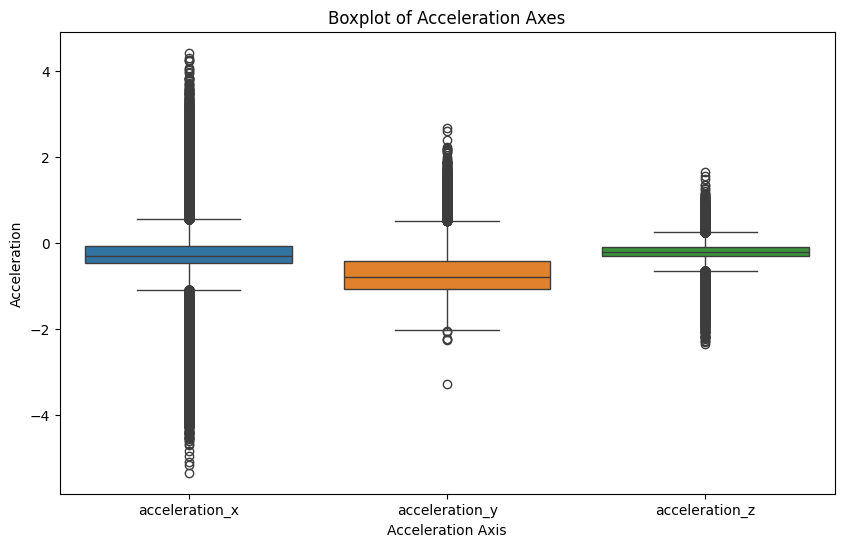

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['acceleration_x', 'acceleration_y', 'acceleration_z']])
plt.title('Boxplot of Acceleration Axes')
plt.xlabel('Acceleration Axis')
plt.ylabel('Acceleration')
plt.show()

We can see that there are some outlier in our model


1.   In Accerlation_x - The value less then -0.25 and greater then 0.25 is consider as outlier
2.   In Accerlation_y -The value less then -2.0 and greater then 0.5 is consider as outlier
3.   In Accerlation_z -The value less then -0.25 and greater then 0.25 is consider as outlier





Checking Outlier for Gyro

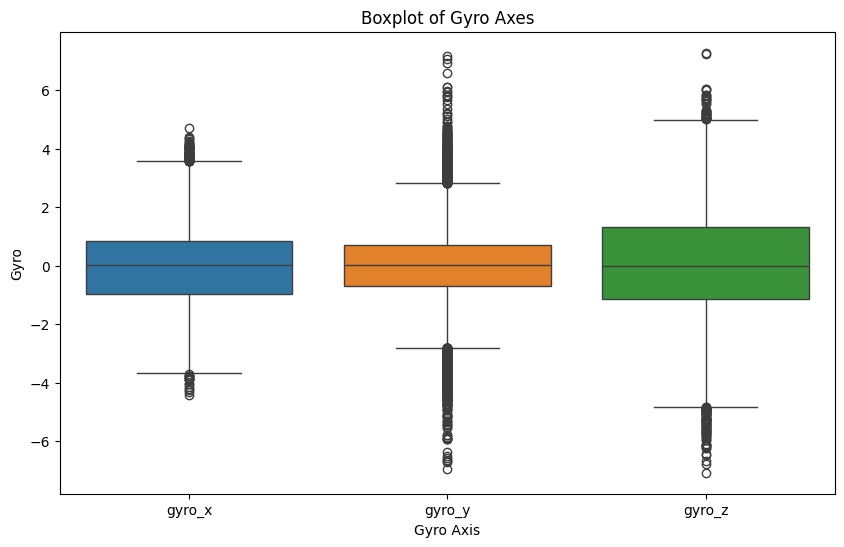

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['gyro_x', 'gyro_y', 'gyro_z']])
plt.title('Boxplot of Gyro Axes')
plt.xlabel('Gyro Axis')
plt.ylabel('Gyro')
plt.show()


1.   In gyro_x - The value less then -3.75 and greater then 3.5 is consider as outlier
2.   In gyro_y -The value less then -3.0 and greater then 3 is consider as outlier
3.   In gyro_z -The value less then -5 and greater then 5 is consider as outlier

Visualizing the target

In [24]:
data['activity'].value_counts()

0    31396
1    17153
Name: activity, dtype: int64

<Axes: xlabel='activity', ylabel='count'>

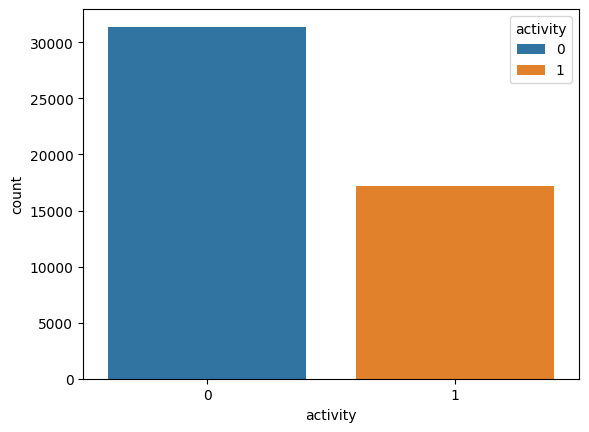

In [32]:
sns.countplot(x = 'activity',data=data,hue="activity")

Here we can see our data is imbalanced

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48549 entries, 0 to 48548
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            48549 non-null  object 
 1   time            48549 non-null  object 
 2   username        48549 non-null  object 
 3   wrist           48549 non-null  int64  
 4   activity        48549 non-null  int64  
 5   acceleration_x  48549 non-null  float64
 6   acceleration_y  48549 non-null  float64
 7   acceleration_z  48548 non-null  float64
 8   gyro_x          48548 non-null  float64
 9   gyro_y          48548 non-null  float64
 10  gyro_z          48548 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.1+ MB


### EDA
univariant analyse

<Axes: xlabel='wrist', ylabel='count'>

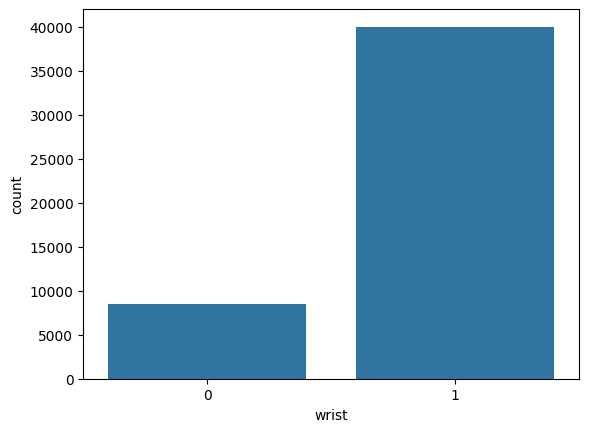

In [28]:
sns.countplot(x = 'wrist',data=data)

Here we can see
wrist with 0 are low to near about 8000

In [34]:
numeric_columns=['wrist','acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']

In [35]:
numerical_data = data[numeric_columns]

In [36]:
numerical_data.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


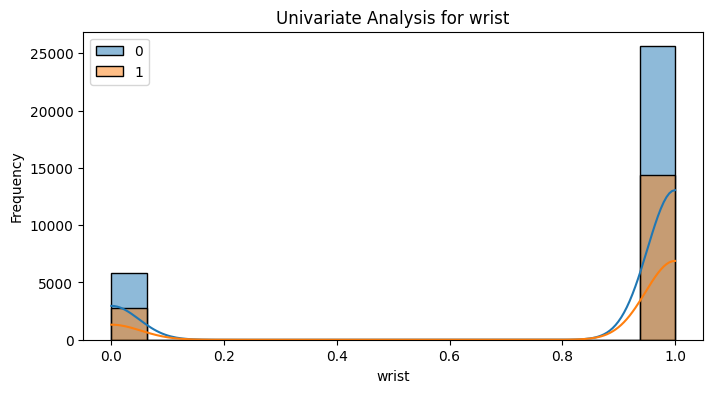

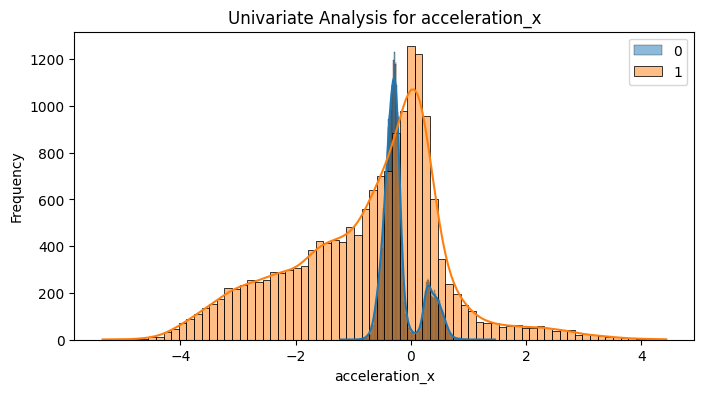

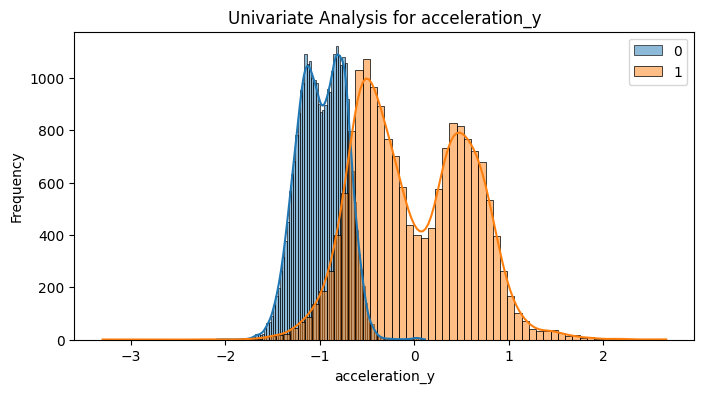

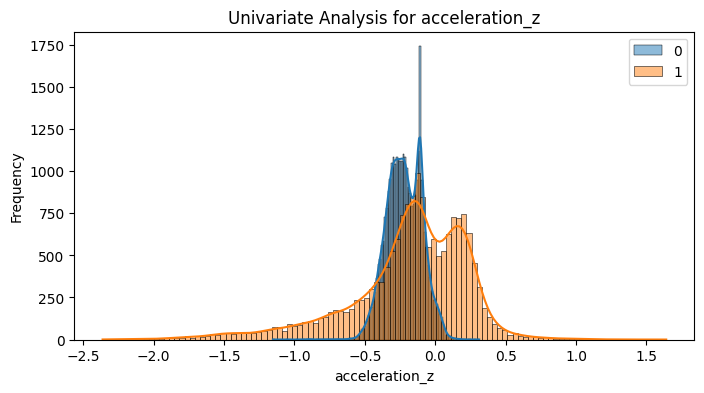

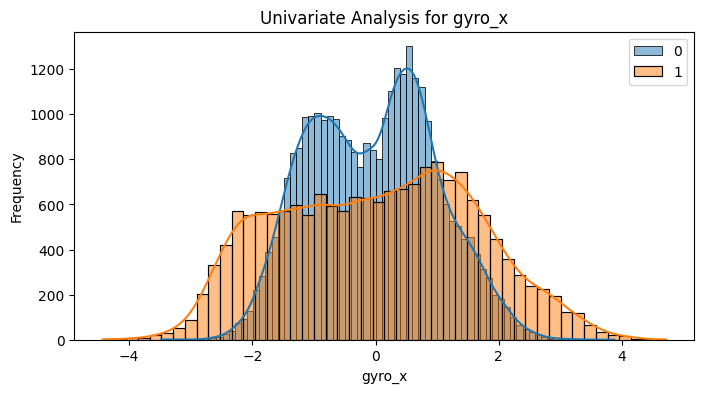

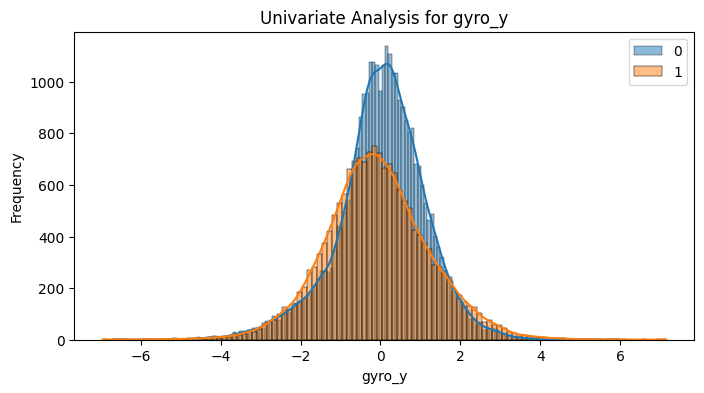

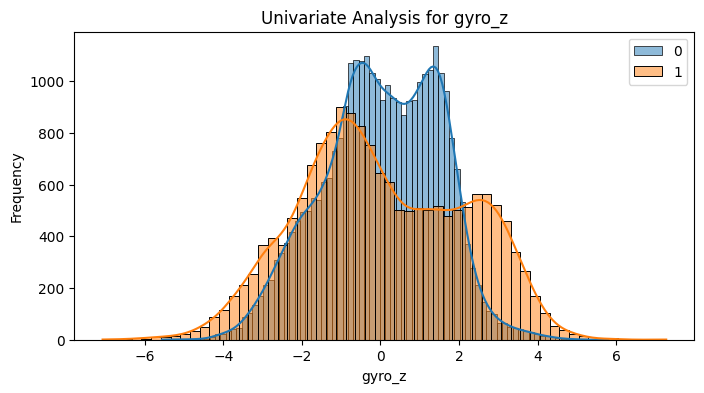

In [37]:
for feature in numerical_data:
    plt.figure(figsize=(8, 4))

    # Create a separate plot for each class (activity)
    for activity in data['activity'].unique():
        subset = data[data['activity'] == activity]
        sns.histplot(subset[feature], kde=True, label=activity)

    plt.title(f'Univariate Analysis for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()

    plt.show()

### EXPLORATORY DATA ANALYSIS

INSIGHTS FROM UNIVARIENT ANALYSIS

wrist:- from the plotting we conclude there is skewness present the this data and at the middle there is no value and the data is skewed to the left side .


accerelation_x = We can see in this our data is slightly left skewed


accerelation_y=


accerelation_z= from this graph it not properly distributed and continuosly overlapping


gyro_x,gyro_y,gyro_z = data is overlapping.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 25.2 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)


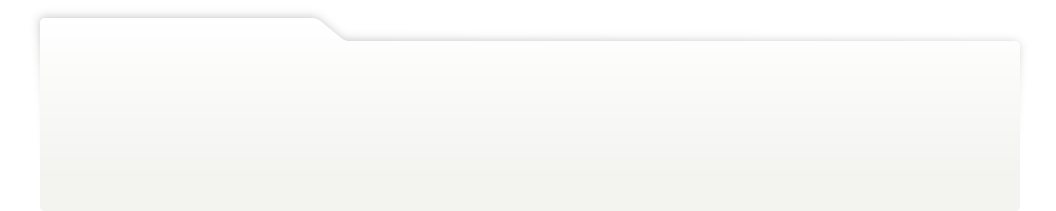
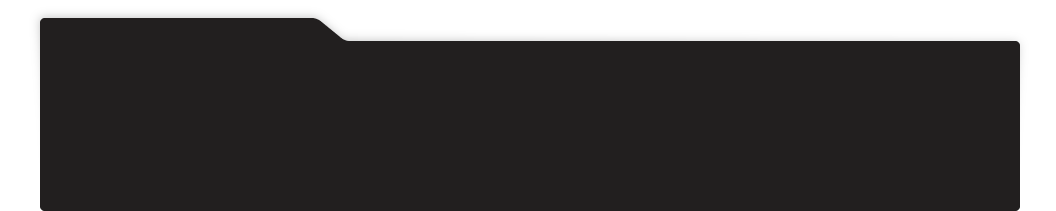
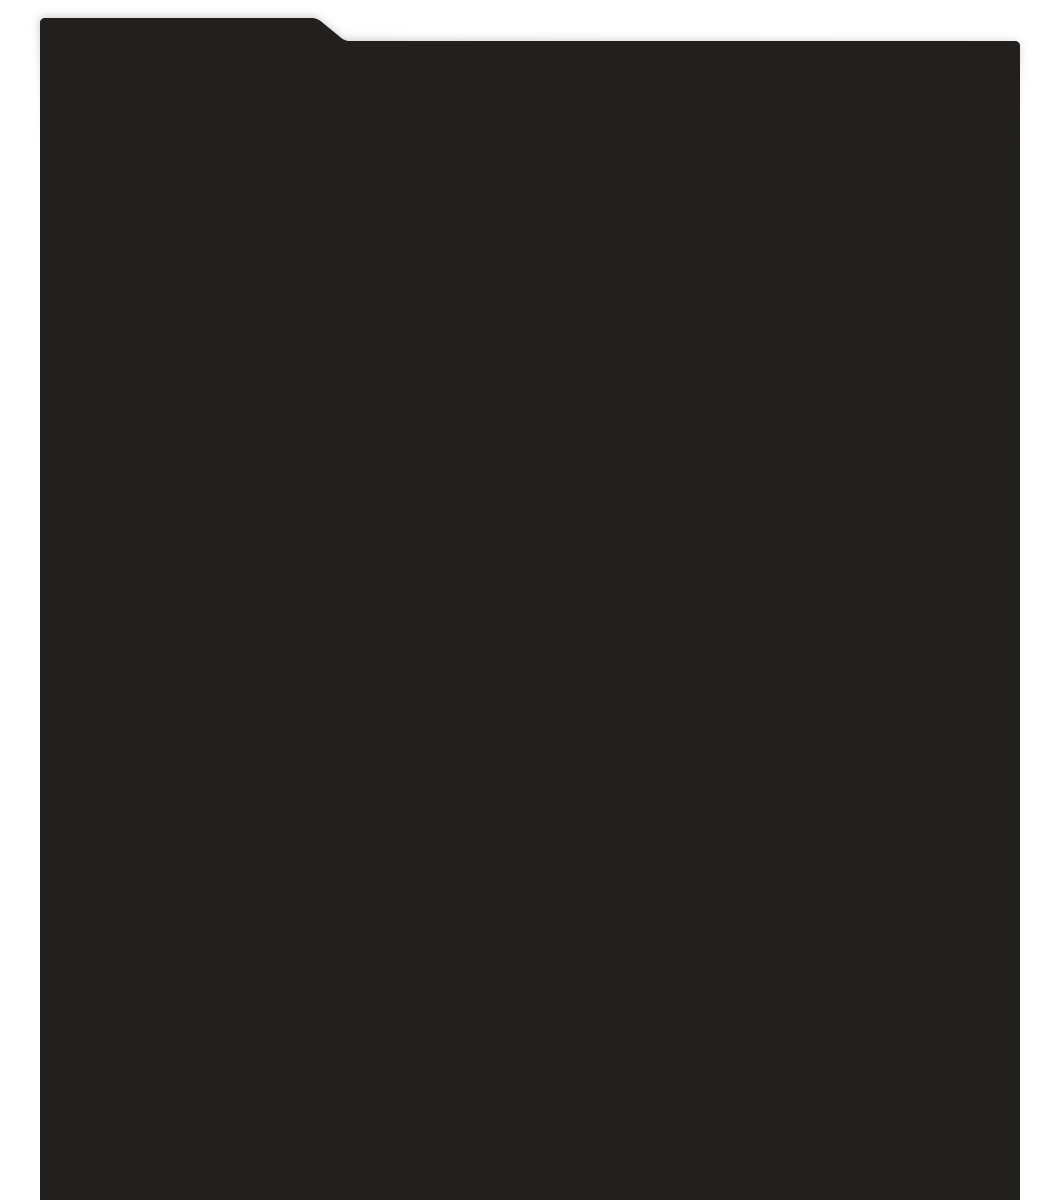
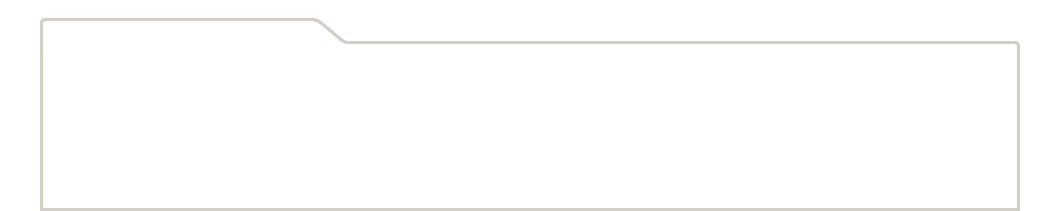
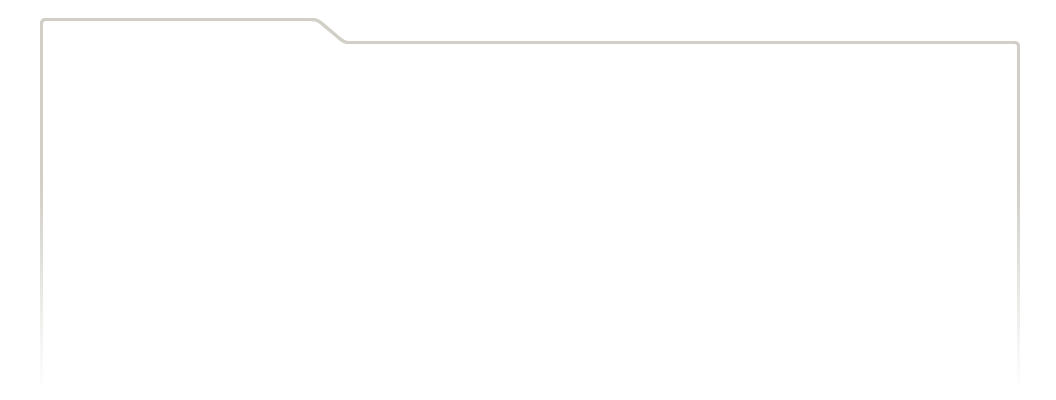
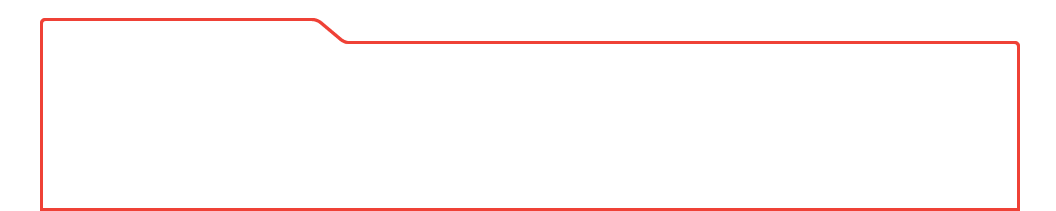
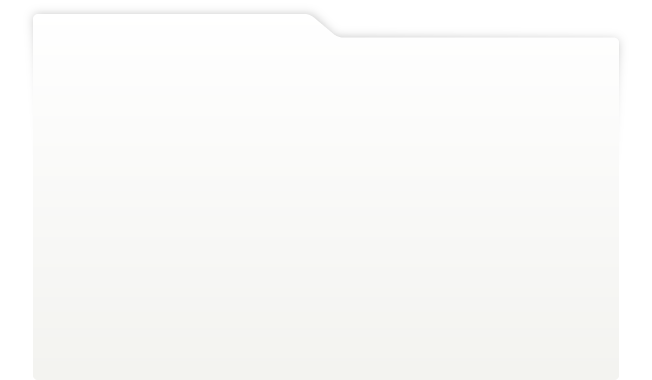
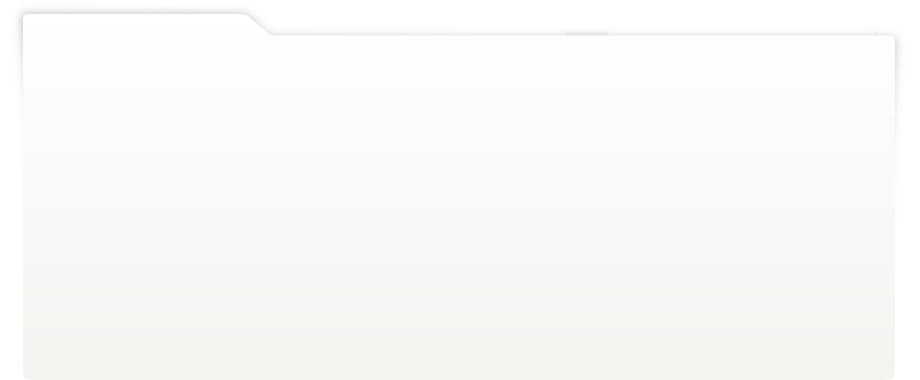
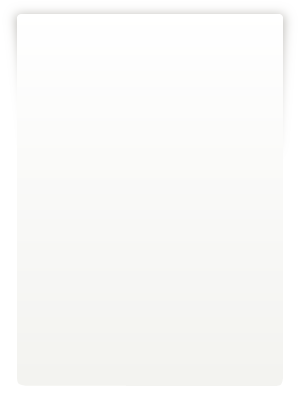
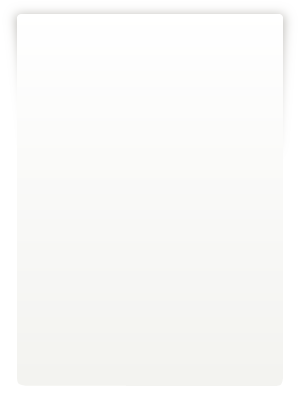
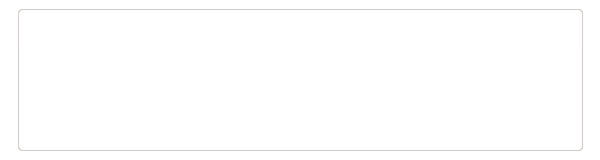
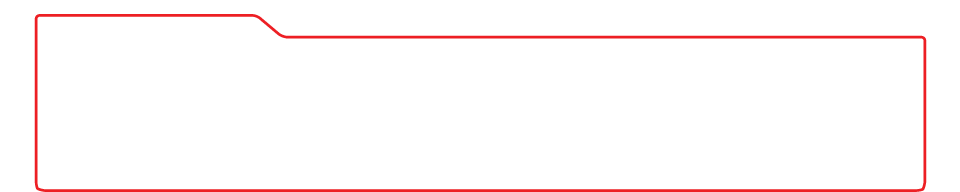
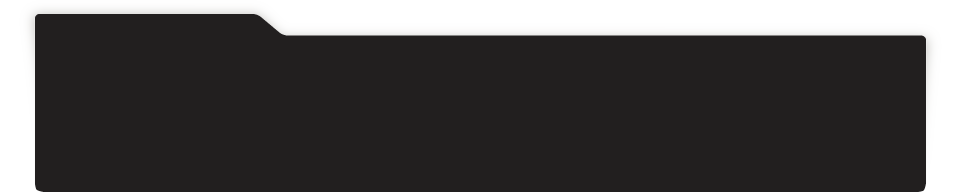
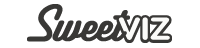
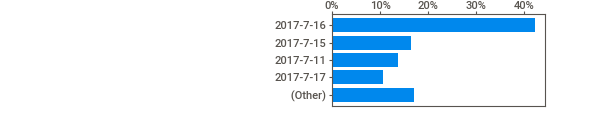
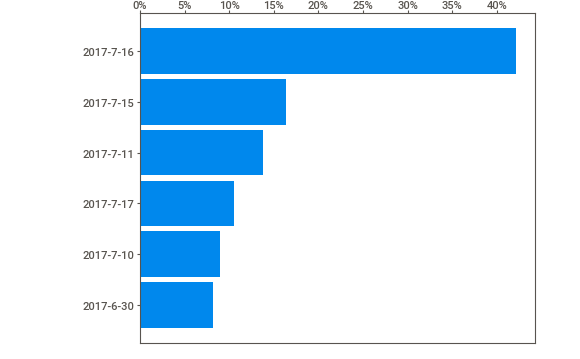
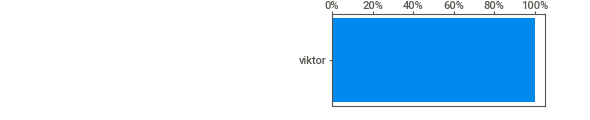
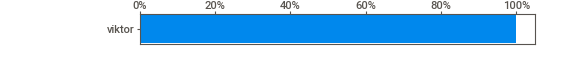
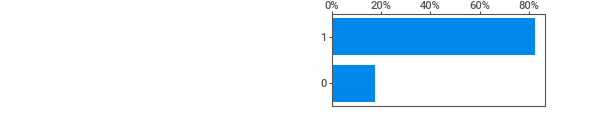
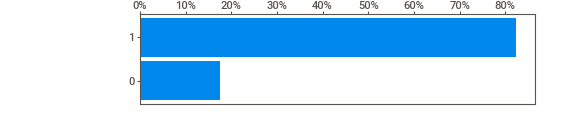
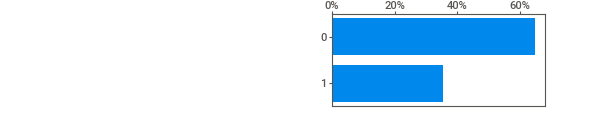
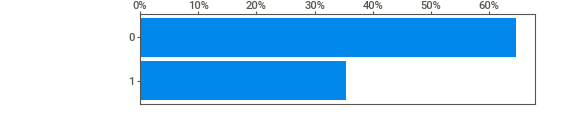
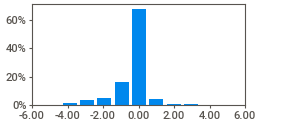
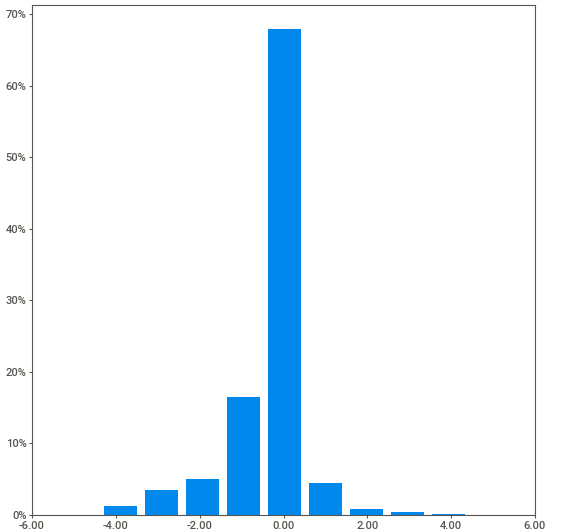
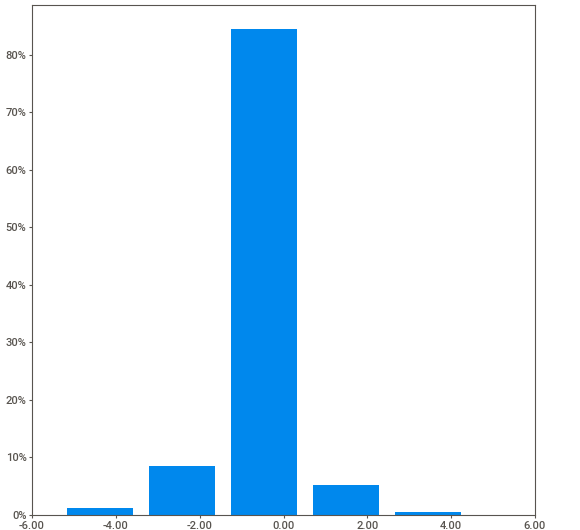
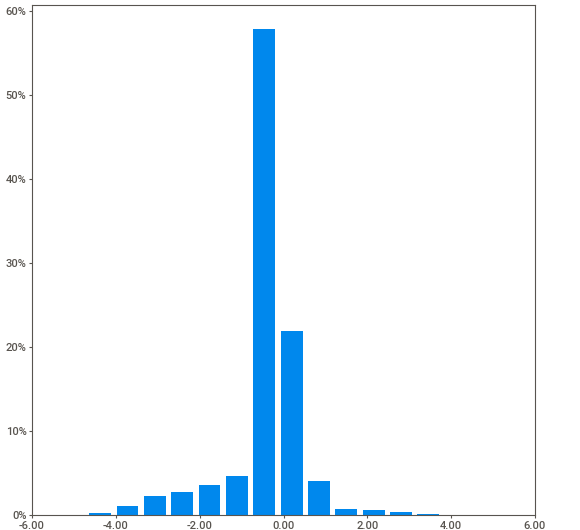
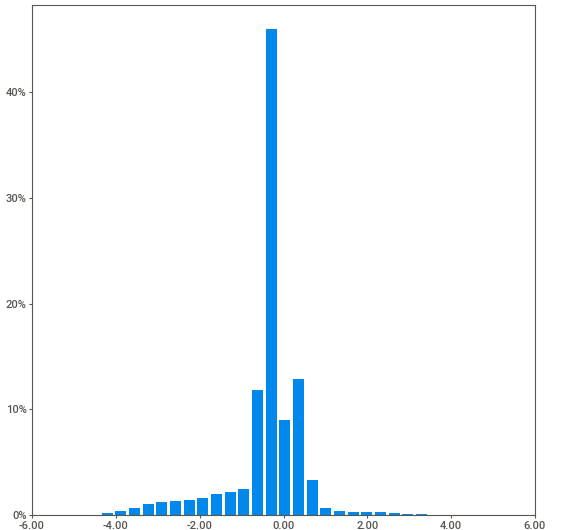
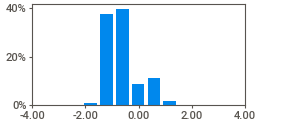
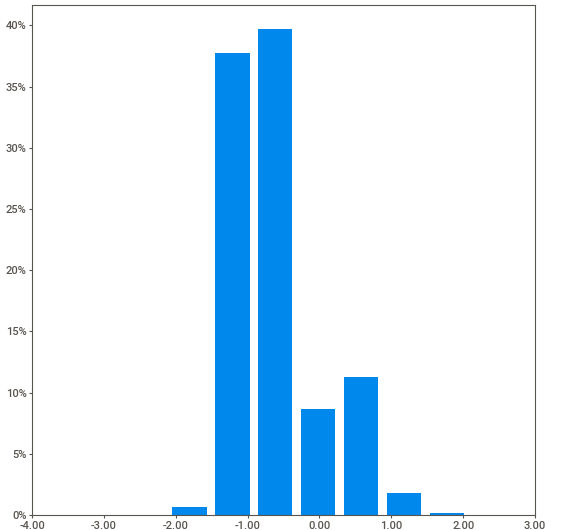
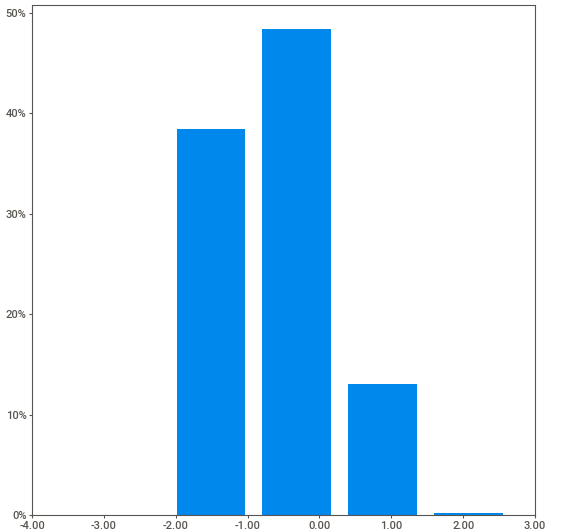
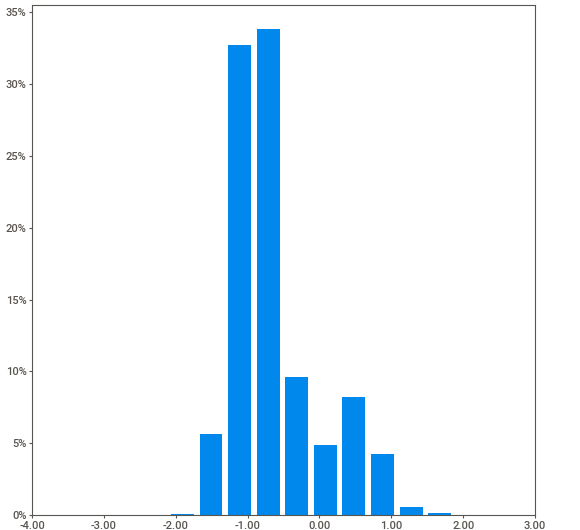
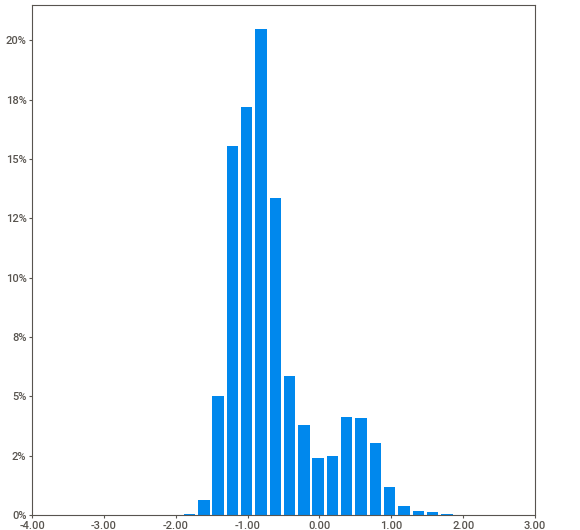
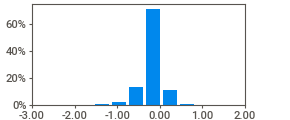
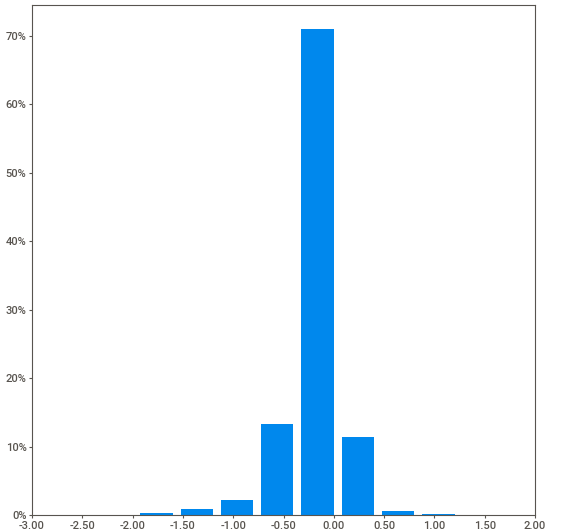
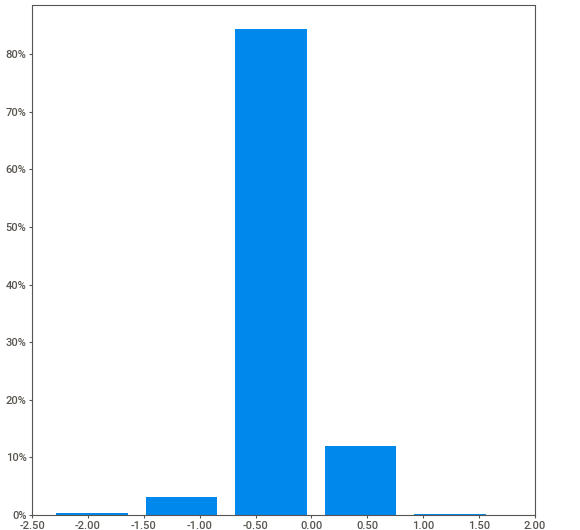
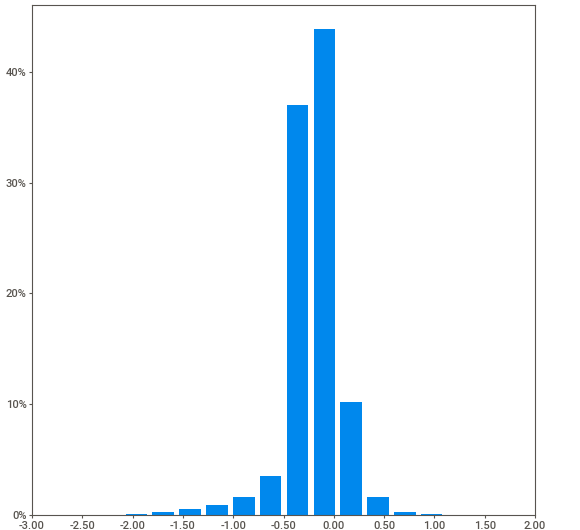
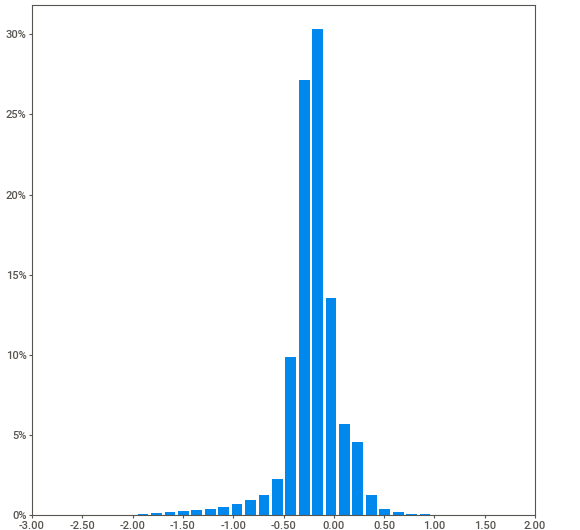
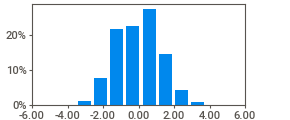
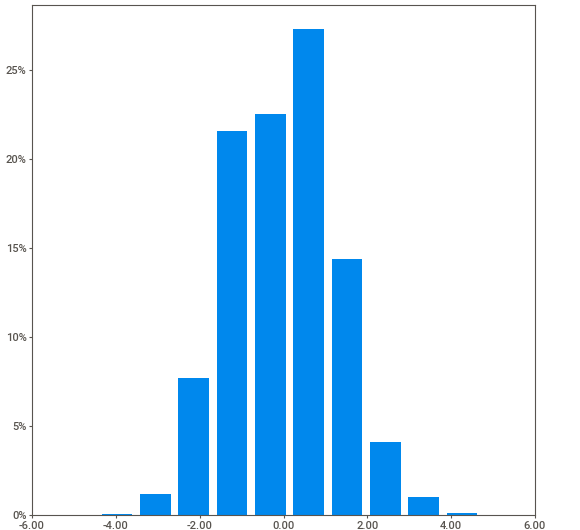
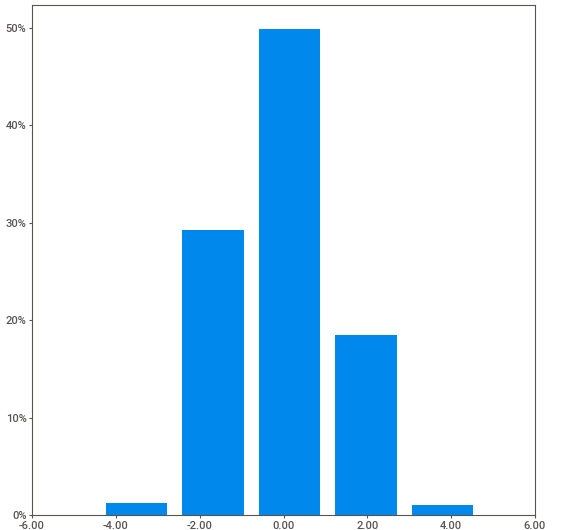
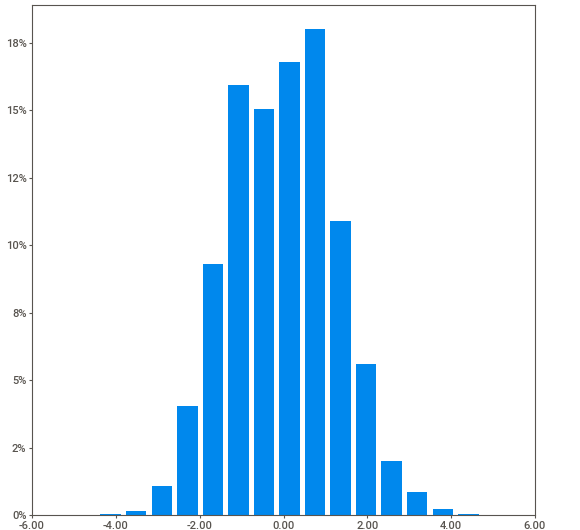
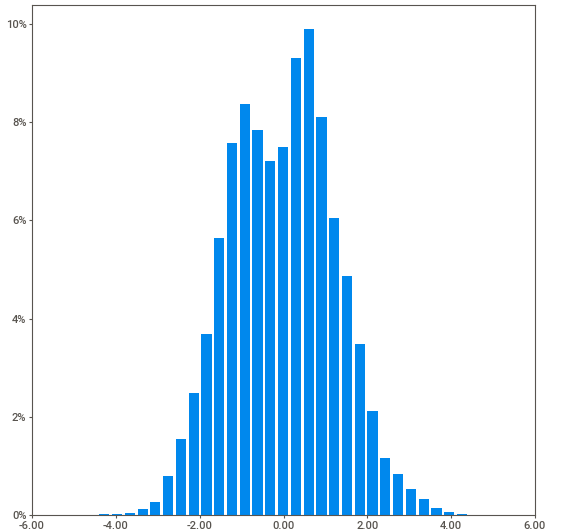
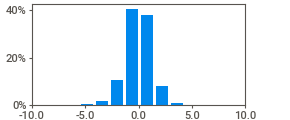
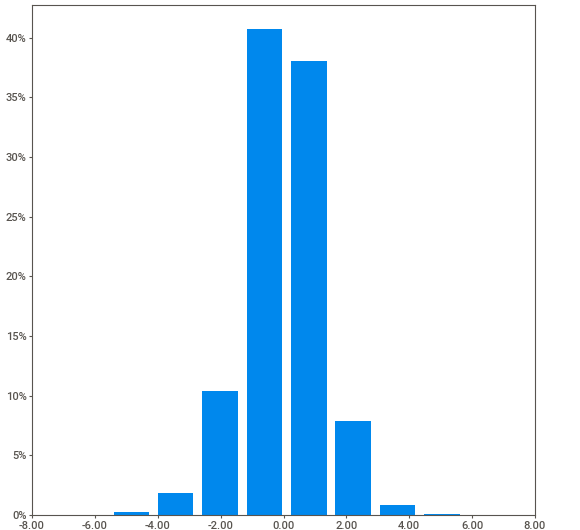
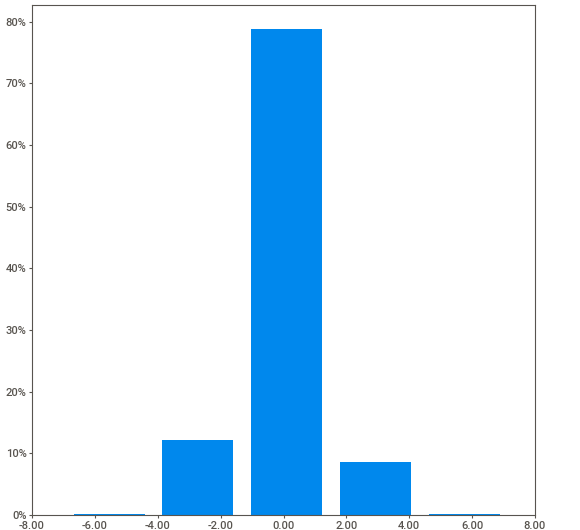
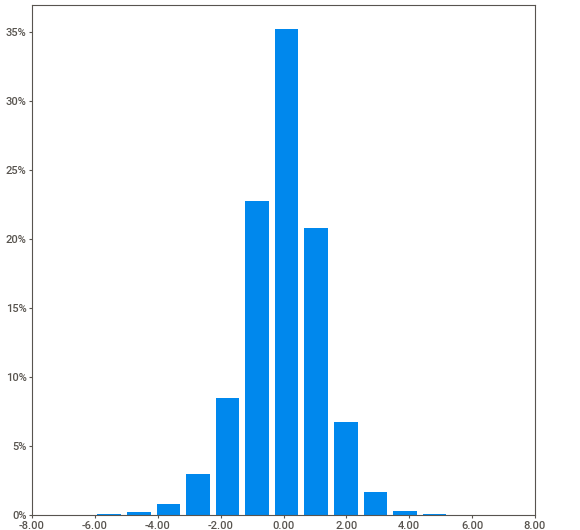
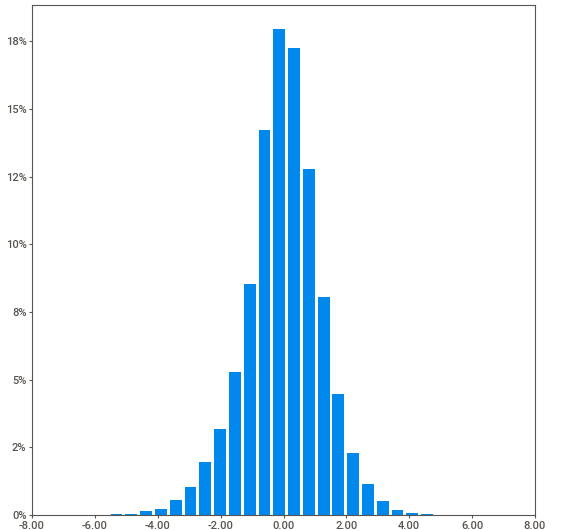
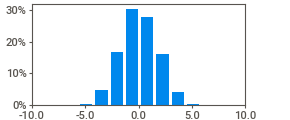
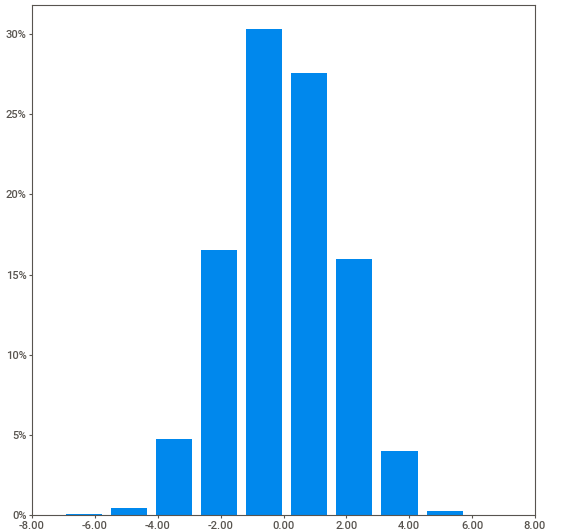
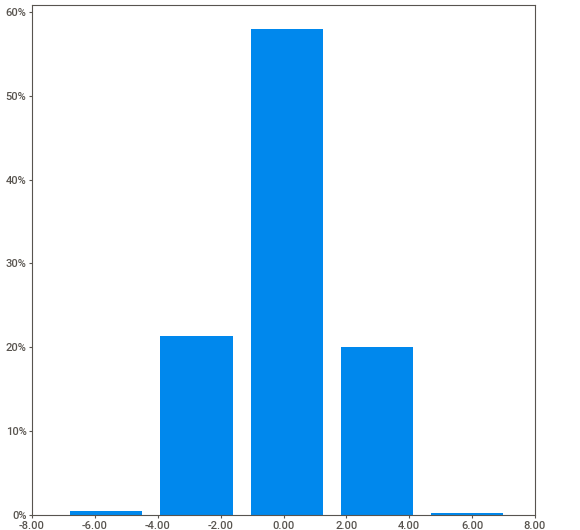
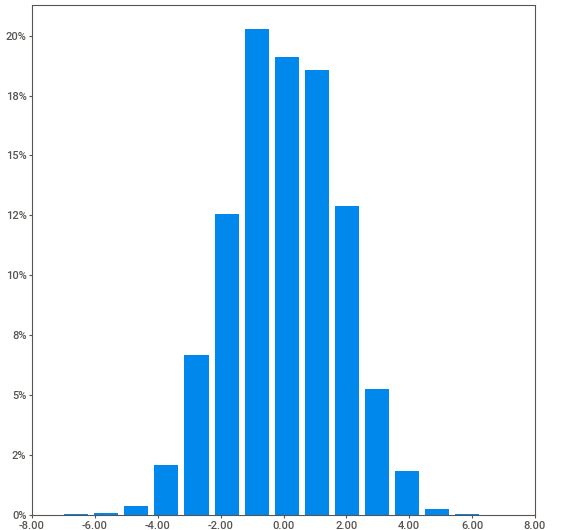
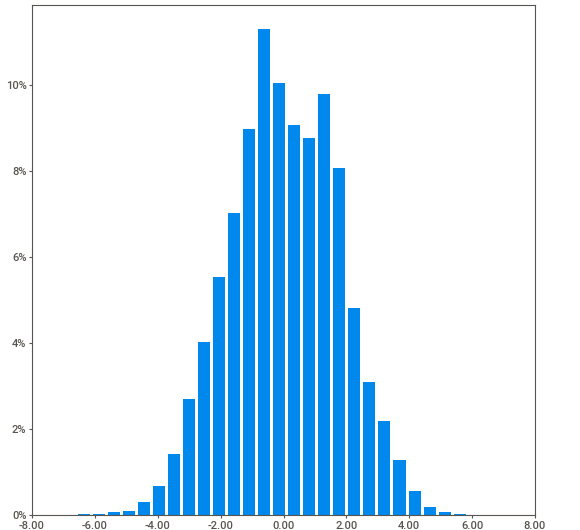
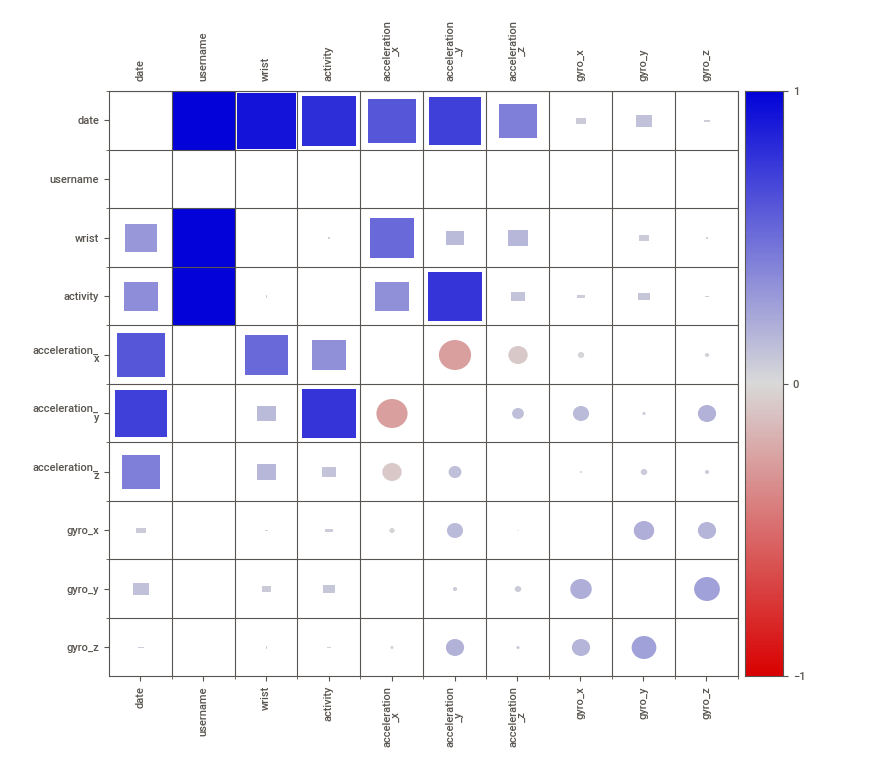
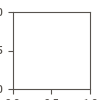

In [38]:
!pip install sweetviz
# We can use sweet viz for a interactive univariate analysis of all columns
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_notebook()

In this we can see
accerlation_x= More then 60% are 0
accerlation_y= Maximum of them negative